In [1]:
# Reading the data and merging it
# Input: 
#   a csv file where each row corresponds to a pair of hospital, performance measure
# Output:
#   (1) df: a pandas dataframe where each row corresponds to a hospital and
#   there is a column for each performance measure with the entry corresponding to the value for the measure
#   i,j entry is the performance rating of hospital i on measure j
#   (2) inverse: maps each Measure Identifier to whether it is an inverse measure or not
#   (3) states: maps each Group PAC ID (hospital identifier) to its state
#   (4) featurenames: maps each Measure Identifier to its Measure Title

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as ss

import collections
from collections import defaultdict

%matplotlib inline
def recursively_default_dict():
    return collections.defaultdict(recursively_default_dict)


df = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv')
measures = set(list(df['Measure Title']))
exp_mids = set(list(df['Measure Identifier']))
print('Experience measures \n{}'.format(measures))

df = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting___Performance_Scores.csv')
measures = set(list(df['Measure Title']))
perf_mids = set(list(df['Measure Identifier']))
print('Performance measures \n{}'.format(measures))


def read_in_rows(records, fname, valcol='Measure Performance Rate', stratum=1):
    perf = pd.read_csv(fname)
    for name, row in perf.iterrows():
        pacid = row['Group PAC ID']
        mid = row['Measure Identifier']
        if stratum > 0:
            mid_root = mid.rstrip().split('_')
            mid_root = mid_root[:-1]
            mid_root.append('1')
            mid = '_'.join(mid_root).rstrip('_')
        val = row[valcol]
        if not mid in records[pacid]:
            records[pacid][mid] = list()
        records[pacid][mid].append(val)
    for pacid in records:
        for mid in records[pacid]:
            records[pacid][mid] = np.mean(records[pacid][mid])
    return records

grp_perf = recursively_default_dict()
grp_perf = read_in_rows(grp_perf, 'Physician_Compare_2015_Group_Public_Reporting___Performance_Scores.csv', stratum=1)
grp_perf = read_in_rows(grp_perf, 'Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv', stratum=0)

df = pd.DataFrame.from_dict(grp_perf, orient='index')
print(list(df))
print(df)
df.to_csv('group_perf.csv')

data = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting___Performance_Scores.csv')
inverse = dict()
states = dict()
featurenames = dict()
for name, row in data.iterrows():
    mid = row['Measure Identifier']
    mid_root = mid.rstrip().split('_')
    mid_root = mid_root[:-1]
    mid_root.append('1')
    mid = '_'.join(mid_root).rstrip('_')
    val = row['Inverse Measure']
    if val == 'Y':
        val = 1
    if val == 'N':
        val = 0
    inverse[mid] = val
    pacid = row['Group PAC ID']
    states[pacid] = row['State']
    featurenames[mid] = row['Measure Title']
data = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv')
for name, row in data.iterrows():
    featurenames[mid] = row['Measure Title']
    mid = row['Measure Identifier']
    featurenames[mid] = row['Measure Title']
print(inverse)
print(states)
print(featurenames)


Experience measures 
set(['Health promotion and education.', 'Getting timely care, appointments, and information.', 'How well clinicians communicate.', 'Clinicians working together for your care.', 'Attention to patient medication cost.', 'Courteous and helpful office staff.', 'Between visit communication.', "Patients' rating of clinicians."])
Performance measures 
set(['Coronary Artery Disease (CAD): Beta-Blocker Therapy \xc2\x96 Prior Myocardial Infarction (MI) or Left Ventricular Systolic Dysfunction (LVEF < 40%)', 'Falls: Plan of Care', 'Use of High-Risk Medications in the Elderly*', 'Adult Kidney Disease: Laboratory Testing (Lipid Profile)', 'Stroke and Stroke Rehabilitation: Discharged on Antithrombotic Therapy', 'Oncology: Cancer Stage Documented', 'Tuberculosis Prevention for Psoriasis, Psoriatic Arthritis and Rheumatoid Arthritis Patients on a Biological Immune Response Modifier', 'Hepatitis C: One-Time Screening for Hepatitis C Virus (HCV) for Patients at Risk', 'Rheumatoid A

['PQRS_GRP_173_1', 'PQRS_GRP_47_1', 'PQRS_GRP_137_1', 'PQRS_GRP_224_1', 'CAHPS_GRP_10', 'PQRS_GRP_7_1', 'CAHPS_GRP_12', 'PQRS_GRP_121_1', 'PQRS_GRP_6_1', 'CAHPS_GRP_5', 'PQRS_GRP_119_1', 'CAHPS_GRP_3', 'CAHPS_GRP_2', 'CAHPS_GRP_1', 'CAHPS_GRP_9', 'CAHPS_GRP_8', 'PQRS_GRP_334_1', 'PQRS_GRP_265_1', 'PQRS_GRP_128_1', 'PQRS_GRP_130_1', 'PQRS_GRP_8_1', 'PQRS_GRP_317_1', 'PQRS_GRP_318_1', 'PQRS_GRP_110_1', 'PQRS_GRP_117_1', 'PQRS_GRP_204_1', 'PQRS_GRP_226_1', 'PQRS_GRP_113_1', 'PQRS_GRP_118_1', 'PQRS_GRP_112_1', 'PQRS_GRP_134_1', 'PQRS_GRP_111_1', 'PQRS_GRP_54_1', 'PQRS_GRP_39_1', 'PQRS_GRP_163_1', 'PQRS_GRP_41_1', 'PQRS_GRP_146_1', 'PQRS_GRP_195_1', 'PQRS_GRP_147_1', 'PQRS_GRP_225_1', 'PQRS_GRP_145_1', 'PQRS_GRP_76_1', 'PQRS_GRP_21_1', 'PQRS_GRP_131_1', 'PQRS_GRP_182_1', 'PQRS_GRP_193_1', 'PQRS_GRP_194_1', 'PQRS_GRP_144_1', 'PQRS_GRP_155_1', 'PQRS_GRP_154_1', 'PQRS_GRP_238_1', 'PQRS_GRP_51_1', 'PQRS_GRP_122_1', 'PQRS_GRP_22_1', 'PQRS_GRP_23_1', 'PQRS_GRP_116_1', 'PQRS_GRP_326_1', 'PQRS_GRP_

{'PQRS_GRP_131_1': 0, 'PQRS_GRP_128_1': 0, 'PQRS_GRP_51_1': 0, 'PQRS_GRP_217_1': 0, 'PQRS_GRP_126_1': 0, 'PQRS_GRP_21_1': 0, 'PQRS_GRP_65_1': 0, 'PQRS_GRP_118_1': 0, 'PQRS_GRP_110_1': 0, 'PQRS_GRP_5_1': 0, 'PQRS_GRP_7_1': 0, 'PQRS_GRP_22_1': 0, 'PQRS_GRP_324_1': 1, 'PQRS_GRP_116_1': 0, 'PQRS_GRP_205_1': 0, 'PQRS_GRP_145_1': 0, 'PQRS_GRP_24_1': 0, 'PQRS_GRP_185_1': 0, 'PQRS_GRP_337_1': 0, 'PQRS_GRP_326_1': 0, 'PQRS_GRP_113_1': 0, 'PQRS_GRP_109_1': 0, 'PQRS_GRP_147_1': 0, 'PQRS_GRP_93_1': 0, 'PQRS_GRP_220_1': 0, 'PQRS_GRP_320_1': 0, 'PQRS_GRP_134_1': 0, 'PQRS_GRP_111_1': 0, 'PQRS_GRP_141_1': 0, 'PQRS_GRP_70_1': 0, 'PQRS_GRP_191_1': 0, 'PQRS_GRP_386_1': 0, 'PQRS_GRP_137_1': 0, 'PQRS_GRP_122_1': 0, 'PQRS_GRP_50_1': 0, 'PQRS_GRP_130_1': 0, 'PQRS_GRP_238_1': 1, 'PQRS_GRP_358_1': 0, 'PQRS_GRP_155_1': 0, 'PQRS_GRP_334_1': 1, 'PQRS_GRP_47_1': 0, 'PQRS_GRP_127_1': 0, 'PQRS_GRP_119_1': 0, 'PQRS_GRP_181_1': 0, 'PQRS_GRP_332_1': 0, 'PQRS_GRP_39_1': 0, 'PQRS_GRP_44_1': 0, 'PQRS_GRP_143_1': 0, 'PQRS_

In [2]:
df.describe()

,PQRS_GRP_173_1,PQRS_GRP_47_1,PQRS_GRP_137_1,PQRS_GRP_224_1,CAHPS_GRP_10,PQRS_GRP_7_1,CAHPS_GRP_12,PQRS_GRP_121_1,PQRS_GRP_6_1,CAHPS_GRP_5,...,PQRS_GRP_386_1,PQRS_GRP_402_1,PQRS_GRP_68_1,PQRS_GRP_53_1,PQRS_GRP_205_1,PQRS_GRP_391_1,PQRS_GRP_40_1,PQRS_GRP_65_1,PQRS_GRP_82_1,PQRS_GRP_261_1
count,538.000000,348.000000,102.000000,94.000000,395.000000,76.000000,396.000000,42.000000,296.000000,408.000000,...,2.000000,6.000000,3.000000,27.000000,3.000000,8.000000,14.000000,15.000000,2.000000,5.000000
mean,79.182156,74.114943,90.352941,98.489362,58.007595,89.335526,26.378788,70.928571,84.952703,60.083333,...,54.500000,73.500000,99.333333,78.240741,57.666667,66.437500,43.142857,86.133333,54.000000,69.800000
std,22.210612,29.485179,23.369883,7.817467,7.420471,15.031609,5.250963,23.360789,17.143002,4.703798,...,64.346717,35.528862,1.154701,18.391768,44.094595,32.902928,30.076459,19.830952,55.154329,43.774422
min,0.000000,0.000000,5.000000,29.000000,35.000000,31.000000,6.000000,6.000000,1.000000,46.000000,...,9.000000,18.000000,98.000000,9.666667,12.000000,16.500000,6.000000,23.000000,15.000000,0.000000
25%,67.000000,59.000000,97.000000,100.000000,53.000000,85.000000,23.000000,56.000000,80.000000,57.000000,...,31.750000,51.500000,99.000000,69.333333,36.500000,46.875000,16.750000,90.000000,34.500000,53.000000
50%,86.500000,87.000000,100.000000,100.000000,58.000000,95.500000,26.000000,69.000000,89.500000,61.000000,...,54.500000,92.000000,100.000000,82.333333,61.000000,77.000000,43.000000,92.000000,54.000000,96.000000
75%,97.000000,98.000000,100.000000,100.000000,63.000000,100.000000,30.000000,95.250000,95.000000,63.000000,...,77.250000,98.750000,100.000000,90.166667,80.500000,88.375000,67.250000,95.000000,73.500000,100.000000
max,100.000000,100.000000,100.000000,100.000000,87.000000,100.000000,43.000000,100.000000,100.000000,73.000000,...,100.000000,100.000000,100.000000,98.500000,100.000000,100.000000,90.000000,100.000000,93.000000,100.000000


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


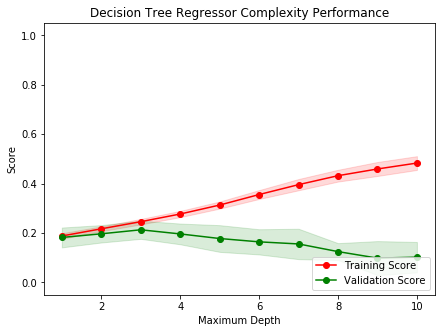

FOR  CAHPS_GRP_1
------------------------------------------------------
PQRS_GRP_111_1 : 0.0596333308189 
 
PQRS_GRP_118_1 : 0.781021622807 
 
PQRS_GRP_131_1 : 0.0560754744862 
 
PQRS_GRP_47_1 : 0.0510174652879 
 
PQRS_GRP_8_1 : 0.0408169970106 
 
PQRS_GRP_7_1 : 0.0114351095892 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_112_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1', 'PQRS_GRP_134_1', 'PQRS_GRP_137_1', 'PQRS_GRP_138_1', 'PQRS_GRP_140_1', 'PQRS_GRP_141_1', 'PQRS_GRP_143_1',

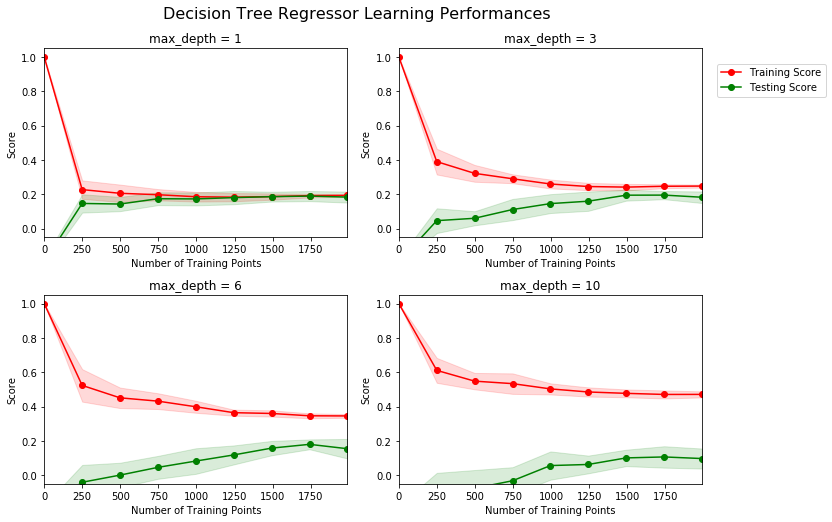

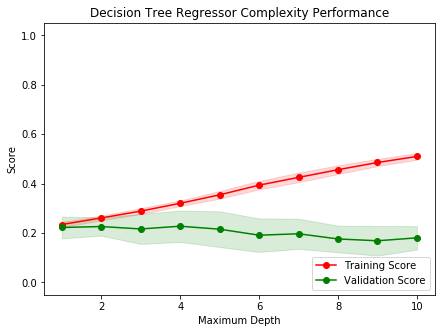

FOR  CAHPS_GRP_10
------------------------------------------------------
PQRS_GRP_112_1 : 0.0375485113601 
 
PQRS_GRP_131_1 : 0.0512101260743 
 
PQRS_GRP_8_1 : 0.911241362566 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_111_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1', 'PQRS_GRP_134_1', 'PQRS_GRP_137_1', 'PQRS_GRP_138_1', 'PQRS_GRP_140_1', 'PQRS_GRP_141_1', 'PQRS_GRP_143_1', 'PQRS_GRP_144_1', 'PQRS_GRP_145_1', 'PQRS_GRP_146_1', 'PQRS_GRP_147_1', 'PQRS_GRP_14_

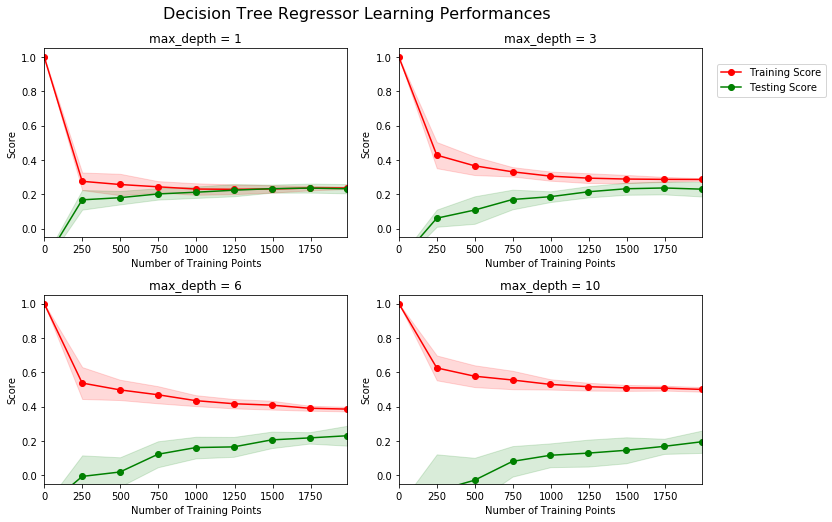

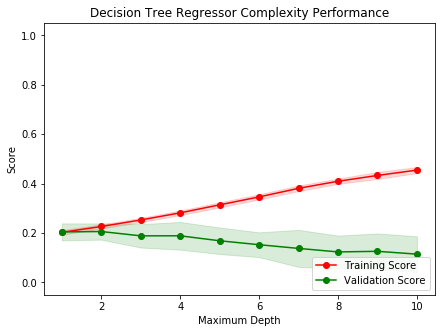

FOR  CAHPS_GRP_12
------------------------------------------------------
PQRS_GRP_111_1 : 0.0377875662495 
 
PQRS_GRP_131_1 : 0.0609680781238 
 
PQRS_GRP_8_1 : 0.901244355627 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_112_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1', 'PQRS_GRP_134_1', 'PQRS_GRP_137_1', 'PQRS_GRP_138_1', 'PQRS_GRP_140_1', 'PQRS_GRP_141_1', 'PQRS_GRP_143_1', 'PQRS_GRP_144_1', 'PQRS_GRP_145_1', 'PQRS_GRP_146_1', 'PQRS_GRP_147_1', 'PQRS_GRP_14_

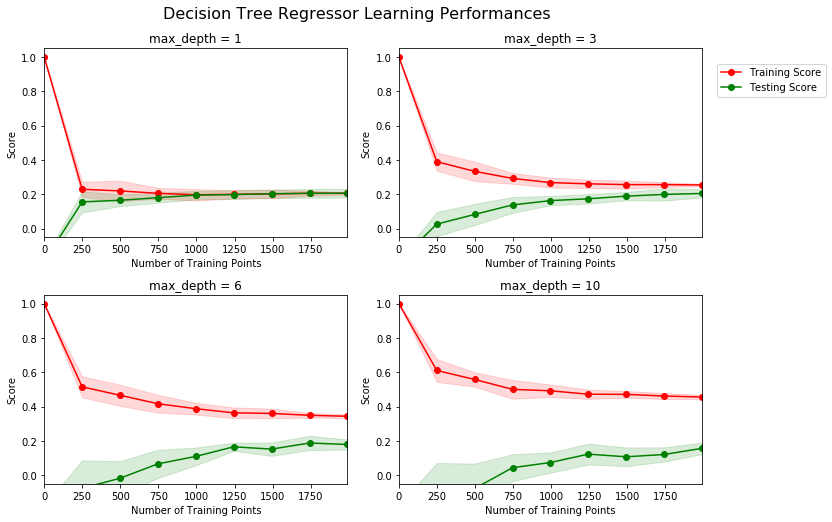

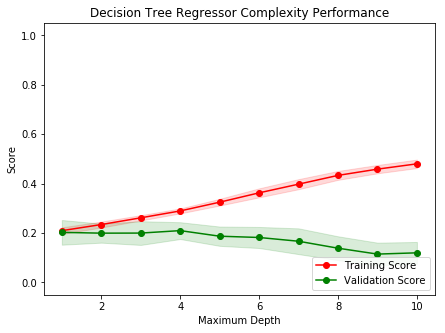

FOR  CAHPS_GRP_2
------------------------------------------------------
PQRS_GRP_111_1 : 0.0244473784953 
 
PQRS_GRP_131_1 : 0.0469058359154 
 
PQRS_GRP_134_1 : 0.0255180666046 
 
PQRS_GRP_173_1 : 0.0557401553429 
 
PQRS_GRP_317_1 : 0.0310442901527 
 
PQRS_GRP_47_1 : 0.0454807736274 
 
PQRS_GRP_6_1 : 0.00334601224439 
 
PQRS_GRP_8_1 : 0.754141910339 
 
PQRS_GRP_7_1 : 0.0133755772786 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_112_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 

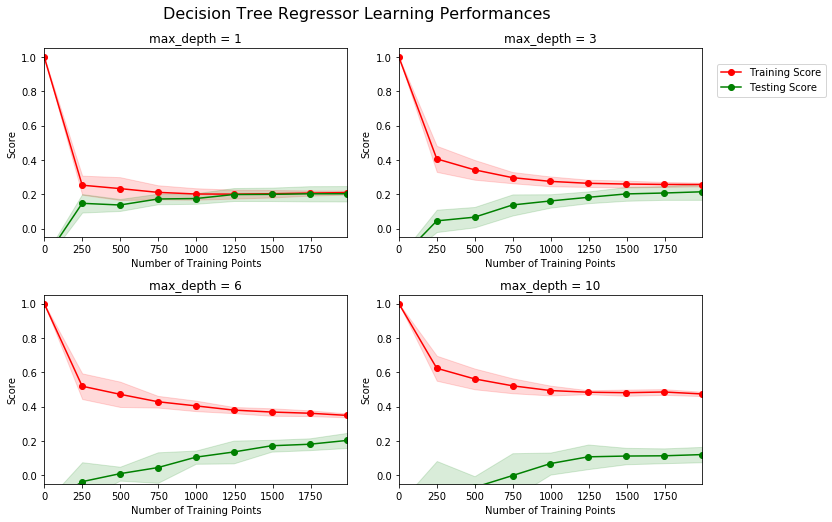

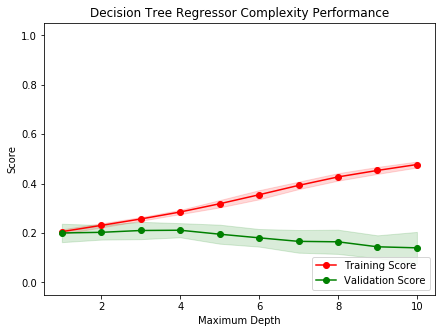

FOR  CAHPS_GRP_3
------------------------------------------------------
PQRS_GRP_111_1 : 0.033828829923 
 
PQRS_GRP_131_1 : 0.0549088216593 
 
PQRS_GRP_134_1 : 0.0357758129402 
 
PQRS_GRP_47_1 : 0.0490210855209 
 
PQRS_GRP_8_1 : 0.812469275806 
 
PQRS_GRP_7_1 : 0.013996174151 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_112_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1', 'PQRS_GRP_137_1', 'PQRS_GRP_138_1', 'PQRS_GRP_140_1', 'PQRS_GRP_141_1', 'PQRS_GRP_143_1', '

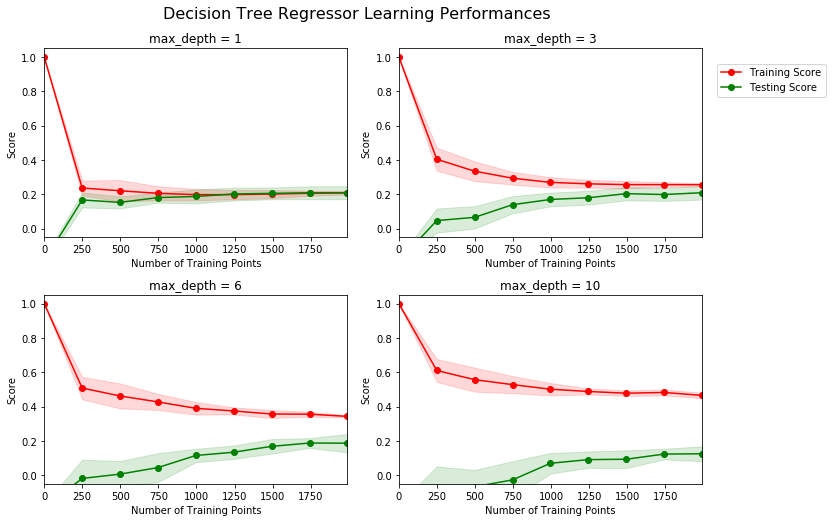

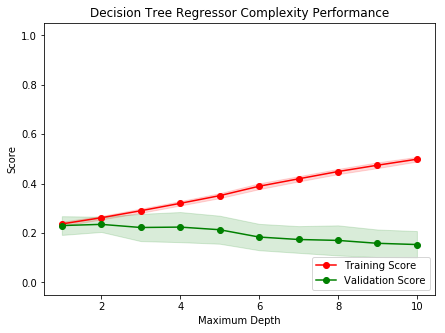

FOR  CAHPS_GRP_5
------------------------------------------------------
PQRS_GRP_113_1 : 0.0382378154812 
 
PQRS_GRP_131_1 : 0.0537762839999 
 
PQRS_GRP_8_1 : 0.907985900519 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_111_1', 'PQRS_GRP_112_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1', 'PQRS_GRP_134_1', 'PQRS_GRP_137_1', 'PQRS_GRP_138_1', 'PQRS_GRP_140_1', 'PQRS_GRP_141_1', 'PQRS_GRP_143_1', 'PQRS_GRP_144_1', 'PQRS_GRP_145_1', 'PQRS_GRP_146_1', 'PQRS_GRP_147_1', 'PQRS_GRP_14_1

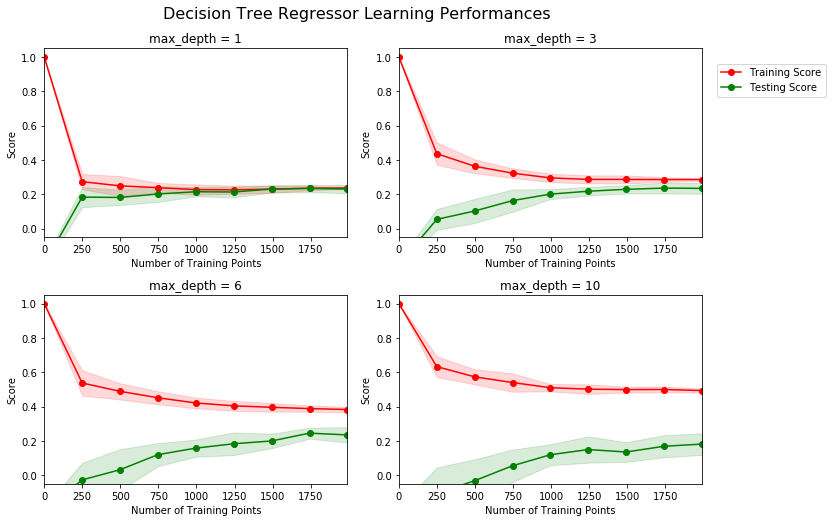

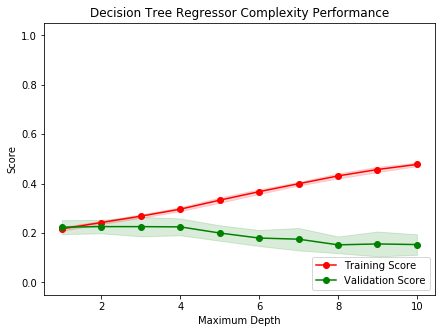

FOR  CAHPS_GRP_8
------------------------------------------------------
PQRS_GRP_112_1 : 0.0313974975984 
 
PQRS_GRP_113_1 : 0.0332489044007 
 
PQRS_GRP_118_1 : 0.0179081639439 
 
PQRS_GRP_130_1 : 4.56555688475e-05 
 
PQRS_GRP_131_1 : 0.0477809333352 
 
PQRS_GRP_173_1 : 0.0504058954015 
 
PQRS_GRP_204_1 : 0.013942030514 
 
PQRS_GRP_47_1 : 0.0453171558888 
 
PQRS_GRP_8_1 : 0.745672417392 
 
PQRS_GRP_122_1 : 0.00377765904718 
 
PQRS_GRP_7_1 : 0.010503686909 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_111_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1

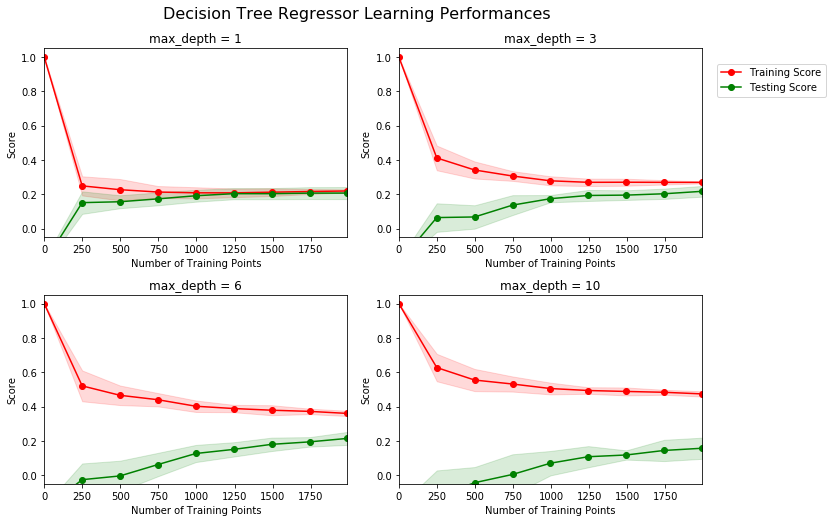

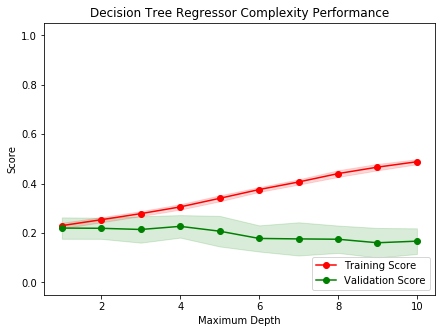

FOR  CAHPS_GRP_9
------------------------------------------------------
PQRS_GRP_111_1 : 0.032030685996 
 
PQRS_GRP_112_1 : 0.0166968469554 
 
PQRS_GRP_131_1 : 0.0460886142239 
 
PQRS_GRP_173_1 : 0.0508368125731 
 
PQRS_GRP_317_1 : 0.0171773317598 
 
PQRS_GRP_47_1 : 0.0436322606383 
 
PQRS_GRP_8_1 : 0.778677745151 
 
PQRS_GRP_122_1 : 0.00332981158599 
 
PQRS_GRP_7_1 : 0.0115298911169 
 
---------------------------------------------------------
(DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'), ['PQRS_GRP_100_1', 'PQRS_GRP_102_1', 'PQRS_GRP_109_1', 'PQRS_GRP_110_1', 'PQRS_GRP_113_1', 'PQRS_GRP_116_1', 'PQRS_GRP_117_1', 'PQRS_GRP_118_1', 'PQRS_GRP_119_1', 'PQRS_GRP_121_1', 'PQRS_GRP_126_1', 'PQRS_GRP_127_1', 'PQRS_GRP_128_1', 'PQRS_GRP_12_1', 'PQRS_GRP_130_1',

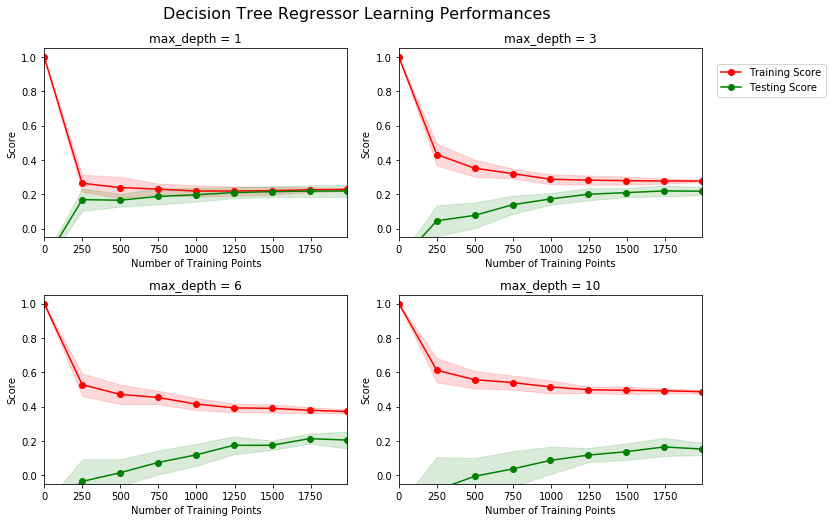

In [3]:
# Model functions

from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets



# X_cols
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
#     print("The best score is " + str(score))
    return score

from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit

import visuals as vs

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
#     cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)

    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, train_size=None, random_state=0)
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

def most_important_1(reg, xcols, X_test, y_test):
    coefs = list(zip(reg.feature_importances_, xcols))
    coefs.sort(key=lambda x: x[0])
    most_important_ids = [c[1] for c in coefs]
    most_important_names = [featurenames[c[1]] for c in coefs]
#     reg = fit_model(X_train, y_train)
    ytesthat = reg.predict(X_test)
    r2 = metrics.r2_score(y_test, ytesthat)
    mse = metrics.mean_squared_error(y_test, ytesthat)
    return reg, most_important_ids, r2, mse

def get_important_features(feature_importances_,X_List):
    count = 0;
    for x in feature_importances_:
        if(x > 0):
            print(str(X_List[count]) + " : " + str(x) + " \n " )
        count = count + 1;
            
    

from sklearn import metrics
def call_DT_Regressor(df):
    Y_List = ['CAHPS_GRP_1','CAHPS_GRP_10','CAHPS_GRP_12','CAHPS_GRP_2','CAHPS_GRP_3','CAHPS_GRP_5','CAHPS_GRP_8','CAHPS_GRP_9']
    X_List = ['PQRS_GRP_100_1',
 'PQRS_GRP_102_1',
 'PQRS_GRP_109_1',
 'PQRS_GRP_110_1',
 'PQRS_GRP_111_1',
 'PQRS_GRP_112_1',
 'PQRS_GRP_113_1',
 'PQRS_GRP_116_1',
 'PQRS_GRP_117_1',
 'PQRS_GRP_118_1',
 'PQRS_GRP_119_1',
 'PQRS_GRP_121_1',
 'PQRS_GRP_126_1',
 'PQRS_GRP_127_1',
 'PQRS_GRP_128_1',
 'PQRS_GRP_12_1',
 'PQRS_GRP_130_1',
 'PQRS_GRP_131_1',
 'PQRS_GRP_134_1',
 'PQRS_GRP_137_1',
 'PQRS_GRP_138_1',
 'PQRS_GRP_140_1',
 'PQRS_GRP_141_1',
 'PQRS_GRP_143_1',
 'PQRS_GRP_144_1',
 'PQRS_GRP_145_1',
 'PQRS_GRP_146_1',
 'PQRS_GRP_147_1',
 'PQRS_GRP_14_1',
 'PQRS_GRP_154_1',
 'PQRS_GRP_155_1',
 'PQRS_GRP_156_1',
 'PQRS_GRP_163_1',
 'PQRS_GRP_173_1',
 'PQRS_GRP_178_1',
 'PQRS_GRP_181_1',
 'PQRS_GRP_182_1',
 'PQRS_GRP_185_1',
 'PQRS_GRP_191_1',
 'PQRS_GRP_193_1',
 'PQRS_GRP_194_1',
 'PQRS_GRP_195_1',
 'PQRS_GRP_19_1',
 'PQRS_GRP_204_1',
 'PQRS_GRP_205_1',
 'PQRS_GRP_217_1',
 'PQRS_GRP_21_1',
 'PQRS_GRP_220_1',
 'PQRS_GRP_221_1',
 'PQRS_GRP_224_1',
 'PQRS_GRP_225_1',
 'PQRS_GRP_226_1',
 'PQRS_GRP_22_1',
 'PQRS_GRP_23_1',
 'PQRS_GRP_24_1',
 'PQRS_GRP_250_1',
 'PQRS_GRP_261_1',
 'PQRS_GRP_265_1',
 'PQRS_GRP_317_1',
 'PQRS_GRP_318_1',
 'PQRS_GRP_320_1',
 'PQRS_GRP_324_1',
 'PQRS_GRP_326_1',
 'PQRS_GRP_32_1',
 'PQRS_GRP_331_1',
 'PQRS_GRP_332_1',
 'PQRS_GRP_334_1',
 'PQRS_GRP_337_1',
 'PQRS_GRP_33_1',
 'PQRS_GRP_358_1',
 'PQRS_GRP_383_1',
 'PQRS_GRP_386_1',
 'PQRS_GRP_395_1',
 'PQRS_GRP_397_1',
 'PQRS_GRP_39_1',
 'PQRS_GRP_400_1',
 'PQRS_GRP_402_1',
 'PQRS_GRP_40_1',
 'PQRS_GRP_41_1',
 'PQRS_GRP_44_1',
 'PQRS_GRP_47_1',
 'PQRS_GRP_48_1',
 'PQRS_GRP_50_1',
 'PQRS_GRP_51_1',
 'PQRS_GRP_52_1',
 'PQRS_GRP_54_1',
 'PQRS_GRP_5_1',
 'PQRS_GRP_65_1',
 'PQRS_GRP_67_1',
 'PQRS_GRP_68_1',
 'PQRS_GRP_69_1',
 'PQRS_GRP_6_1',
 'PQRS_GRP_70_1',
 'PQRS_GRP_71_1',
 'PQRS_GRP_72_1',
 'PQRS_GRP_76_1',
 'PQRS_GRP_82_1',
 'PQRS_GRP_8_1',
 'PQRS_GRP_93_1',
 'PQRS_GRP_122_1',
 'PQRS_GRP_238_1',
 'PQRS_GRP_391_1',
 'PQRS_GRP_46_1',
 'PQRS_GRP_53_1',
 'PQRS_GRP_7_1']
    
    X = df[X_List]
    X.head()
    X = X.fillna(0)
    for yname in Y_List:
        y = df[yname]
        y = y.to_frame()
        y = y.fillna(0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        reg = fit_model(X_train, y_train)
        vs.ModelComplexity(X_train, y_train)
        vs.ModelLearning(X, y)
        ytesthat = reg.predict(X_test)
        r2 = metrics.r2_score(y_test, ytesthat)
        mse = metrics.mean_squared_error(y_test, ytesthat)
        xcols = X_train.columns
        print("FOR  " + yname)
        print("------------------------------------------------------")
        get_important_features(reg.feature_importances_,X_List)
        print("---------------------------------------------------------")        
        print(most_important_1(reg, xcols, X_test, y_test))
        print("-------------------------------------------------------")

call_DT_Regressor(df)